<a href="https://colab.research.google.com/github/kermityan/EPAM-DS-ML-Course-Notebooks/blob/main/DataScience_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploratory Data Analysis**

Here I'm performing a comprehensive analysis of a given dataset in order to understand data, domain where it came from, identify input and output variables, their types, statistic parameters, and find out how do they corellate with each other.   
First, we need to import all needed libraries and load data from csv file.  

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer, OneHotEncoder, OrdinalEncoder
from sklearn.feature_selection import VarianceThreshold
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

from sklearn.decomposition import PCA, TruncatedSVD, NMF
from sklearn.manifold import TSNE

In [ ]:
df = pd.read_csv('./bank-additional-full.csv', sep=';')

Taking a glimpse on a dataset. Getting familiar with it's fields, type of values, amount of rows and columns.  

In [ ]:
df.head(15)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


The domain where our data came from is a banking business. The dataset consists of records on every client who was reached during the marketing campaign. Every record contains three blocks of data - (1) the customer's personal info (age, education, job, presence of loans, etc.), (2) information on the marketing campaign (number of previous calls, duration of the last call, month and day of the week of the last call, the outcome of the previous campaign), and (3) some macroeconomic parameters of the moment of the last call to the client (consumer price index, Euribor 3-month rate, etc.). The output (target) variable is the result of the current campaign (yes - if the customer signed for the term deposit, no - if not).       

In [ ]:
df.shape

(41188, 21)

The dataset consist of 21 columns and has 41188 rows.

Finding if there Null (NaN) valuest in the dataset and their quantity by fields:

In [ ]:
print(df.isnull().sum())

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


So there are no actual Null values in the dataset. Still, there are "unknown" values in different columns (job, education, marital, default, etc.) which we may treat as a separate class. There is also a special value of 999 in 'pdays' which means "never contacted with this client before" and it probably could have been converted to NaN as the 999 value will affect severely all the statistics of this numerical variable.   

In [ ]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

Checking the types of columns give us knowledge that most of our variables (including the target variable) are categorical as they represent characteristics of a person/marketing calls or campaign results, and consist of a set of different categories. However, we also have got a few numerical variables - with discrete data (number of calls, duration of the call,  number of days since a contact during the previous campaign), and continuous data (all the economic indices).

Checking the min and max values for the categorical variables has little sense as it doesn't give us any meaningful information:

In [ ]:
df.min()

age                     17
job                 admin.
marital           divorced
education         basic.4y
default                 no
housing                 no
loan                    no
contact           cellular
month                  apr
day_of_week            fri
duration                 0
campaign                 1
pdays                    0
previous                 0
poutcome           failure
emp.var.rate          -3.4
cons.price.idx      92.201
cons.conf.idx        -50.8
euribor3m            0.634
nr.employed         4963.6
y                       no
dtype: object

It seems much more useful to check unique values for the different variables in the dataset and the number of records with the different values in the set:

In [ ]:
df['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr',
       'sep'], dtype=object)

This shows that for some reason there aren't 'jan' and 'feb' values in the dataset. Probably the campaign took place from March till December.

In [ ]:
df['campaign'].value_counts()

1     17642
2     10570
3      5341
4      2651
5      1599
6       979
7       629
8       400
9       283
10      225
11      177
12      125
13       92
14       69
17       58
16       51
15       51
18       33
20       30
19       26
21       24
22       17
23       16
24       15
27       11
29       10
28        8
26        8
25        8
31        7
30        7
35        5
32        4
33        4
34        3
42        2
40        2
43        2
56        1
39        1
41        1
37        1
Name: campaign, dtype: int64

The 'Campaign' variable shows the number of calls performed during the current campaign. We can see here that the majority of customers got few calls (not more than 5-10), but there are some distinct outliers here as well - some customers got more than 30, and even 56 (in the most extreme case) calls.

In [ ]:
df['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

Here we can see the results of the current marketing campaign. The bank got 4640 new term deposits out of total 41188 customers (~11%).

In [ ]:
df['poutcome'].value_counts()

nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64

And here we can see the results of the previous campaign. It was successful with 1373 customers from those also reached in this campaign. I think it might be usefull to check how many of these customers are also agreed on the proposal of the current campaign. My guess is that this variable could correlate with the target significantly.

In [ ]:
df['job'].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [ ]:
df['education'].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [ ]:
df['marital'].value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

In the last three lines, we can see a values distribution of categorical variables related to the personal characteristics of bank clients. It seems that the majority of customers have got a university degree or finished high school. Their job is mainly administrative, or they are blue-collar or technicians. And finally, the vast majority of customers are married. Unfortunately, that information itself doesn't give us any sense of a correlation between these characteristics and the outcome of the marketing campaign.  

In [ ]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


The last output gives us basic statistics of the numeric variables such as mean, standard deviation, and quartiles - Q1, Q2 (median), and Q3, as well as min and max values. Here we can identify variables that have potential outliers - the ones where the max value is significantly bigger than the Q3 quartile. These are definitely 'duration' and' campaign'. Zeros in all three quartiles in 'previous' show that the majority of lines have 0 in this column. And another case in 'pdays' where all three quartiles have the value of 999 (which is not a real but a "special" value meaning "never contacted") shows that only a tiny part of the customers was contacted in the previous campaign and majority were not previously contacted instead. If we want to see real statistics of this variable we should get rid of these special values and replace them with NaN.

In [ ]:
df['previous'].value_counts()

0    35563
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: previous, dtype: int64

In [ ]:
df['pdays'] = df['pdays'].replace(999, np.nan)

In [ ]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,1515.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,6.014521,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,3.824906,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,3.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,6.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,7.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,27.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In the output above we can see actual statistics of a 'pdays' variable excluding the "special" value. As we can see the number of lines with a value different from 999 is drastically lower than the overall number of lines (only about 3,5%)

In [ ]:
df.describe(include = "all")

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,41188,41188,41188,41188,41188,41188,41188,41188,41188,...,41188.000000,1515.000000,41188.000000,41188,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188
unique,NaN,12,4,8,3,3,3,2,10,5,...,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,...,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,10422,24928,12168,32588,21576,33950,26144,13769,8623,...,NaN,NaN,NaN,35563,NaN,NaN,NaN,NaN,NaN,36548
mean,40.02406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.567593,6.014521,0.172963,NaN,0.081886,93.575664,-40.502600,3.621291,5167.035911,NaN
std,10.42125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.770014,3.824906,0.494901,NaN,1.570960,0.578840,4.628198,1.734447,72.251528,NaN
min,17.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.634000,4963.600000,NaN
25%,32.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,3.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.344000,5099.100000,NaN
50%,38.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,6.000000,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,NaN
75%,47.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.000000,7.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           1515 non-null   float64
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Below I'am taking a closer look into 'duration' variable.

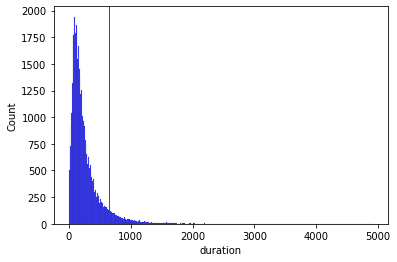

In [ ]:
Q1 = df.duration.quantile(0.25)
Q3 = df.duration.quantile(0.75)
IQR = Q3 - Q1
#limits:
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

sns.histplot(df["duration"], color="blue", label="Call duration")
plt.axvline(upper_limit, linewidth=1 , color = 'red')


plt.show()

As we can see on the histogram a vast majority of calls have a duration between 0 and 500 seconds. However, we got an x-axis stretched up to 5000 seconds, indicating outliers lying between 1200 and 5000.  

In [ ]:
filter = (df['duration'] >= 0) & (df['duration'] <= 120)
df[filter]['age'].count()

12917

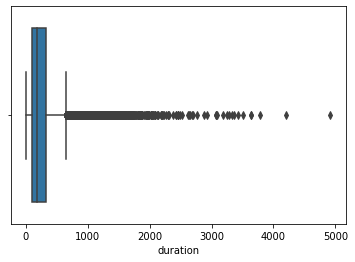

In [ ]:
sns.boxplot(x = 'duration', data = df)
plt.show()

On the boxplot, we can see all these potential outliers lying above the upper whisker. And we can see that there is quite a big amount of them. A lot of calls have a duration between 500 and 3000 seconds which seems reasonable considering that there are a lot of elderly people among the customers who probably need a longer time to get familiar with all the conditions of the offer. So I am going to assume that there are real calls and not errors in the data. However, calls longer than 3000 seconds I would assume as real outliers as I can't believe that such long calls are possible under the marketing campaign.    

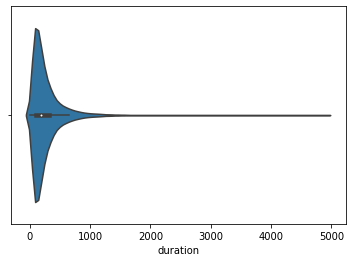

In [ ]:
sns.violinplot(
    x='duration',
    data=df);

The Violin plot visualizes a distribution of the 'duration' variable and confirms my previous conclusions. This variable has a median at 180, Q1 = 102, and Q3 = 319, so most values lie in this range. However there are a lot of potential outliers lying above the upper limit all the way to 5000, but the majority of them are lying under 2000 seconds.  

For the univariate analysis for a categorical variable we can use a barplot (countplot), but it gives us just a visual representation of the distribution of the value:   

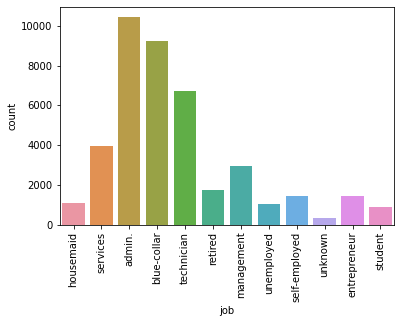

In [ ]:
sns.countplot(x = 'job', data = df)
plt.xticks(rotation = 90)
plt.show()

Below I am going to try different plot types to visualize given data and find out some dependencies between variables.

In order to visually see the correlation between the target which is a categorical and numeric variables I am going to use the multiple histograms method - putting two hists (one for each possible value of the target) on the same plot. It can be informative as we can see proportions between 'yes/no' target values depending on the different levels of values of the numeric variable.  

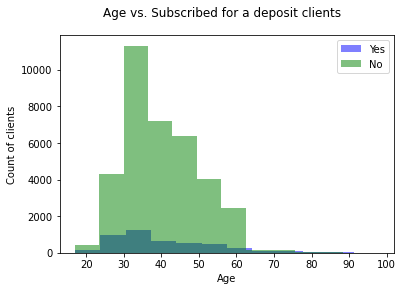

In [ ]:
fig, ax = plt.subplots()

ax.hist(df[df["y"]=='yes']["age"], bins=12, alpha=0.5, color="blue", label="Yes")
ax.hist(df[df["y"]=='no']["age"], bins=12, alpha=0.5, color="green", label="No")

ax.set_xlabel("Age")
ax.set_ylabel("Count of clients")

fig.suptitle("Age vs. Subscribed for a deposit clients")

ax.legend();

For the age, I can't define the significant correlation between any range and the target variable as the shapes of hists are pretty similar and proportions between target values are roughly the same. Maybe the proportion is a bit higher on the second and sixth bars which indicates that peoples aged 25-30 and 50-60 are more likely to accept an offer for a term deposit than the other age ranges.

We can also try to get some useful information from the multiple (double) boxplots - one for each target outcome.  

Text(0.5, 0.98, 'Age vs. Subscribed for a deposit clients')

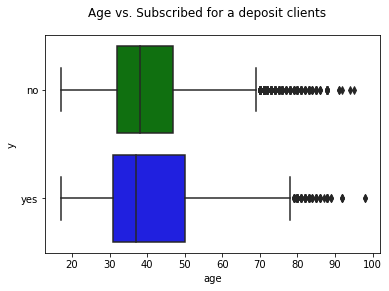

In [ ]:
fig, ax = plt.subplots()

sns.boxplot(x="age", y="y", data=df, orient="h", palette={'yes':"blue", 'no':"green"}, ax=ax)

#ax.get_yaxis().set_visible(False)

fig.suptitle("Age vs. Subscribed for a deposit clients")

#x.legend();

Here we can see that distributions for 'yes' and 'no' are slightly different. Even though the median is approximately the same, the IQR of 'yes' is remarkably wider, with the median lying closer to the left side of the box, and the upper whisker of this boxplot is much longer that indicates that this distribution ('yes') is more right-skewed than 'no'. This means that people aged 45+ accepted the offer more frequently than declined it. On both boxplots, we see a lot of potential outliers, but I assume that these are not errors but actual long-livers.

In order of seeking correlation between two categorical variables I am going to use vertically stacked barplots for two possible outcomes of the target for each of the categories of examinated variable. On plots of this kind, we might see the proportion between positive and negative outcomes per category.

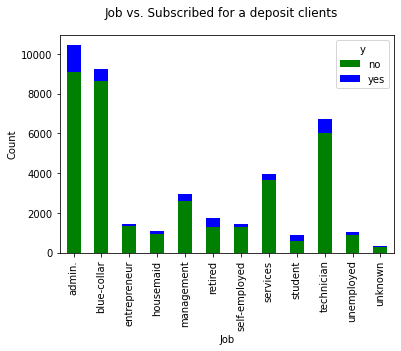

In [ ]:
counts_df = df.groupby(["job", "y"])["age"].count().unstack()
fig, ax = plt.subplots()

counts_df.plot(kind="bar", stacked=True, color=["green", "blue"], ax=ax)
ax.set_xlabel("Job")
ax.set_ylabel("Count")
plt.xticks(rotation = 90)

fig.suptitle("Job vs. Subscribed for a deposit clients");

From this plot, we can distinguish a few job groups with a higher proportion toward the 'yes' answer. From my point of view, these are retired people and students. In these groups, about 25-30% accepted the offer which is much higher than in other groups. But if we are going to choose groups with the maximum number of accepting the offer that will be other groups - administrative, blue-collar, and technicians, which are much higher populated in the first place.   

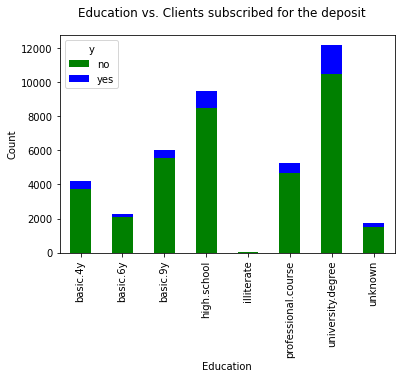

In [ ]:
counts_df = df.groupby(["education", "y"])["age"].count().unstack()
fig, ax = plt.subplots()

counts_df.plot(kind="bar", stacked=True, color=["green", "blue"], ax=ax)
plt.xticks(rotation = 90)
ax.set_ylabel("Count")
ax.set_xlabel("Education")

fig.suptitle("Education vs. Clients subscribed for the deposit");

From this plot, I couldn't see any distinct correlation between education and the target variable. Both distributions seem alike.

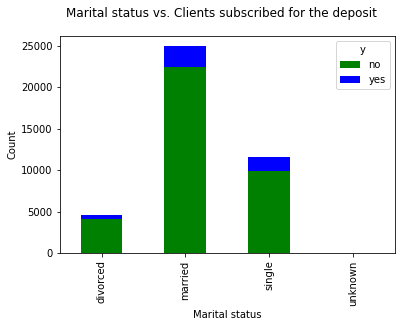

In [ ]:
counts_df = df.groupby(["marital", "y"])["age"].count().unstack()
fig, ax = plt.subplots()

counts_df.plot(kind="bar", stacked=True, color=["green", "blue"], ax=ax)
plt.xticks(rotation = 90)
ax.set_ylabel("Count")
ax.set_xlabel("Marital status")

fig.suptitle("Marital status vs. Clients subscribed for the deposit");

From this plot, I couldn't see any distinct correlation between marital status and the target variable. Both distributions seem alike.

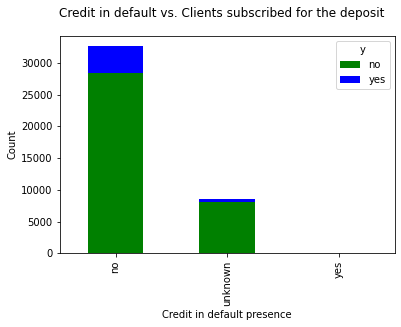

In [ ]:
counts_df = df.groupby(["default", "y"])["age"].count().unstack()
fig, ax = plt.subplots()

counts_df.plot(kind="bar", stacked=True, color=["green", "blue"], ax=ax)
plt.xticks(rotation = 90)
ax.set_ylabel("Count")
ax.set_xlabel("Credit in default presence")

fig.suptitle("Credit in default vs. Clients subscribed for the deposit");

Here we can see that we actually have customers without credits in default or with unknown status of this parameter. Just a couple of clients confessed that they have defaulted on their previous loans and they all declined a new proposal (we can see it if we change the scale of the plot, using plt.ylim([0,5]) for example). Distributions for yes/no on the other two groups seem alike so I can't get any guesses from this plot as well. Probably the only correlation here is that if the prospect has credits in default it highly likely to decline other proposals for bank services. But we don't have enough data to claim it for sure.   

In [ ]:
df['default'].value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

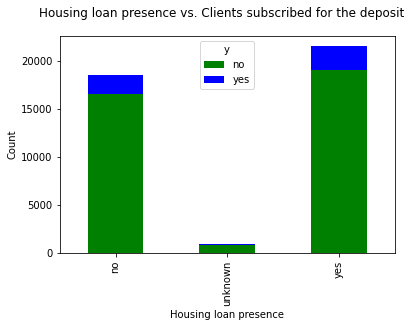

In [ ]:
counts_df = df.groupby(["housing", "y"])["age"].count().unstack()
fig, ax = plt.subplots()

counts_df.plot(kind="bar", stacked=True, color=["green", "blue"], ax=ax)
plt.xticks(rotation = 90)
ax.set_ylabel("Count")
ax.set_xlabel("Housing loan presence")

fig.suptitle("Housing loan presence vs. Clients subscribed for the deposit");

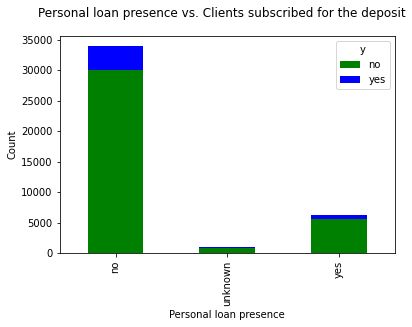

In [ ]:
counts_df = df.groupby(["loan", "y"])["age"].count().unstack()
fig, ax = plt.subplots()

counts_df.plot(kind="bar", stacked=True, color=["green", "blue"], ax=ax)
plt.xticks(rotation = 90)
ax.set_ylabel("Count")
ax.set_xlabel("Personal loan presence")

fig.suptitle("Personal loan presence vs. Clients subscribed for the deposit");

Housing loan and personal loan barplots shows approximately the same proportion between target outcomes on all it's categories which mean no corellation between this variables and the target.

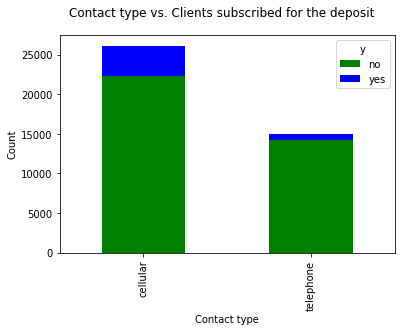

In [ ]:
counts_df = df.groupby(["contact", "y"])["age"].count().unstack()
fig, ax = plt.subplots()

counts_df.plot(kind="bar", stacked=True, color=["green", "blue"], ax=ax)
plt.xticks(rotation = 90)
ax.set_ylabel("Count")

ax.set_xlabel("Contact type")

fig.suptitle("Contact type vs. Clients subscribed for the deposit");

This plot shows that much more successful calls (in the target variable perspective) were performed through cellular phones instead of land-line. It might be caused by the fact that these days it is much easier to reach people by cellular than by landline so probably the majority of calls to a home phone were unsuccessful. This correlates with the fact that according to the 'duration' variable huge amount of calls have a duration of 0 seconds.  

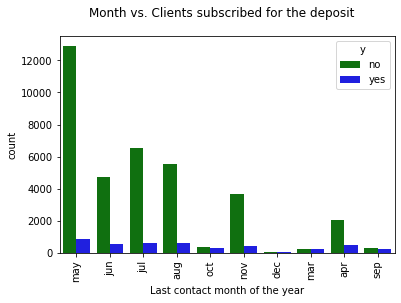

In [ ]:
fig, ax = plt.subplots()

sns.countplot(x="month", hue="y", data=df, palette={'yes':"blue", 'no':"green"}, ax=ax)
plt.xticks(rotation = 90)

ax.set_xlabel("Last contact month of the year")

fig.suptitle("Month vs. Clients subscribed for the deposit");

This plot shows that particularly 3 out of all 10 months seem the most productive with a success rate of about 50% - March, September, and October. At the same time, there was the lowest number of calls in these months compared with other months. It is interesting but I haven't a decent explanation of this phenomenon. One more thing is that December has nearly 0 number of calls. It could indicate that the campaign was finished in the first days of Dec so there were very few calls landed this month.

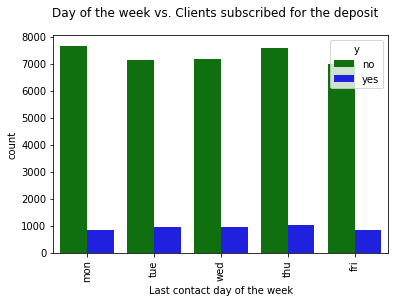

In [ ]:
fig, ax = plt.subplots()

sns.countplot(x="day_of_week", hue="y", data=df, palette={'yes':"blue", 'no':"green"}, ax=ax)
plt.xticks(rotation = 90)

ax.set_xlabel("Last contact day of the week")

fig.suptitle("Day of the week vs. Clients subscribed for the deposit");

Here we can see that there is no correlation between the day of the week when the call was done and its success rate as proportions are almost the same on all the days.

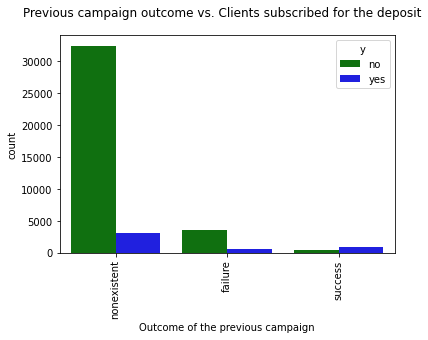

In [ ]:
fig, ax = plt.subplots()

sns.countplot(x="poutcome", hue="y", data=df, palette={'yes':"blue", 'no':"green"}, ax=ax)
plt.xticks(rotation = 90)

ax.set_xlabel("Outcome of the previous campaign")

fig.suptitle("Previous campaign outcome vs. Clients subscribed for the deposit");

This plot shows that even though the majority of customers being reached during the current campaign didn't take part in the previous one. For the rest who did there is a strong correlation between the previous campaign's outcome and the current outcome - the tendency is that if the customer accepted a previous offer from the bank it is much more likely to accept the next offer as well.

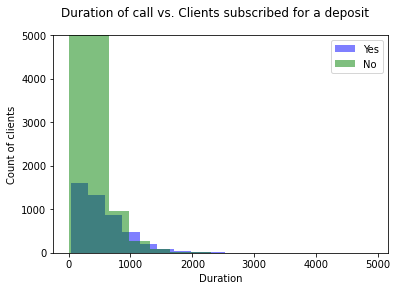

In [ ]:
fig, ax = plt.subplots()

ax.hist(df[df["y"]=='yes']["duration"], bins=15, alpha=0.5, color="blue", label="Yes")
ax.hist(df[df["y"]=='no']["duration"], bins=15, alpha=0.5, color="green", label="No")

ax.set_xlabel("Duration")
ax.set_ylabel("Count of clients")
plt.ylim([0,5000])
fig.suptitle("Duration of call vs. Clients subscribed for a deposit")

ax.legend();

For the next numeric variable, which is call duration, I use again multiple histogram method. It helps to compare 'yes/no' proportions for different bins on the scale of examined variable. In this particular case, we see a strong correlation - while the call duration increased toward 1000 seconds proportion of successful calls tends to raise to 50% and even more when the duration of calls goes to 1500 seconds. It seems that this variable is the most impacting on the outcome so far.    

I tried to investigate this variable through a scatterplot to get more knowledge about its impact on the target but failed as the result (on the figure below) doesn't make much sense. My conclusion is that this kind of plot is not suitable for visualizing correlation when the target variable is categorical.

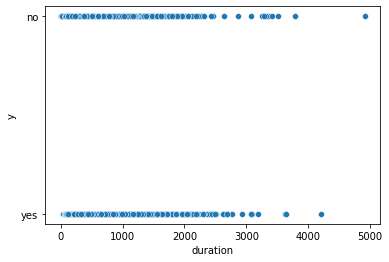

In [ ]:
sns.scatterplot(data=df, x="duration", y="y")
plt.show()

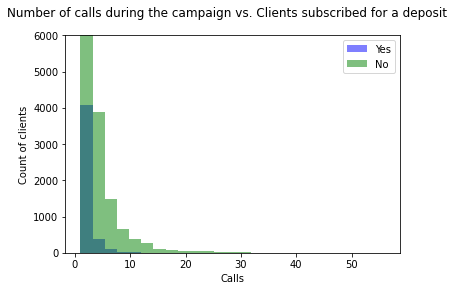

In [ ]:
fig, ax = plt.subplots()

ax.hist(df[df["y"]=='yes']["campaign"], bins=10, alpha=0.5, color="blue", label="Yes")
ax.hist(df[df["y"]=='no']["campaign"], bins=25, alpha=0.5, color="green", label="No")

ax.set_xlabel("Calls")
ax.set_ylabel("Count of clients")
plt.ylim([0,6000])
fig.suptitle("Number of calls during the campaign vs. Clients subscribed for a deposit")

ax.legend();

Here we see that the most customers accepted the offer was called not more than 5 times. This variable seems to has negative correlation on success rate. The more calls to the certain customer done - the less chance that the customer accept the offer.

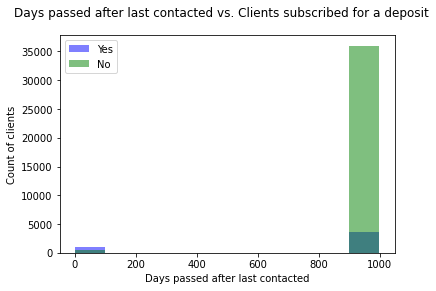

In [ ]:
df['pdays'] = df['pdays'].replace(np.nan, 999)

fig, ax = plt.subplots()

ax.hist(df[df["y"]=='yes']["pdays"], bins=10, alpha=0.5, color="blue", label="Yes")
ax.hist(df[df["y"]=='no']["pdays"], bins=10, alpha=0.5, color="green", label="No")

ax.set_xlabel("Days passed after last contacted")
ax.set_ylabel("Count of clients")
#plt.ylim([0,6000])
fig.suptitle("Days passed after last contacted vs. Clients subscribed for a deposit")

ax.legend();

Here we have two plots on 'pdays' variable - above with the original values including the special 999 value, below - for the data cleared from the special value. The inference here is that there is a slight correlation - if the customer was contacted 2-6 days before the last call it is more probable that it accepted the current campaign's offer. Even so, most of the 'yes' outcomes quantitively were through new clients who were never contacted before.  

In [ ]:
df['pdays'] = df['pdays'].replace(999, np.nan)

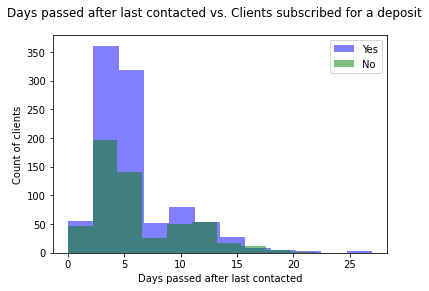

In [ ]:
fig, ax = plt.subplots()

ax.hist(df[df["y"]=='yes']["pdays"], bins=12, alpha=0.5, color="blue", label="Yes")
ax.hist(df[df["y"]=='no']["pdays"], bins=10, alpha=0.5, color="green", label="No")

ax.set_xlabel("Days passed after last contacted")
ax.set_ylabel("Count of clients")
#plt.ylim([0,6000])
fig.suptitle("Days passed after last contacted vs. Clients subscribed for a deposit")

ax.legend();

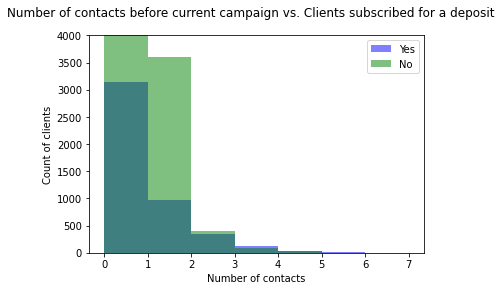

In [ ]:
fig, ax = plt.subplots()

ax.hist(df[df["y"]=='yes']["previous"], bins=6, alpha=0.5, color="blue", label="Yes")
ax.hist(df[df["y"]=='no']["previous"], bins=7, alpha=0.5, color="green", label="No")

ax.set_xlabel("Number of contacts")
ax.set_ylabel("Count of clients")
plt.ylim([0,4000])
fig.suptitle("Number of contacts before current campaign vs. Clients subscribed for a deposit")

ax.legend();

This figure shows that the number of contacts before the current campaign affects the current outcome - the more the number of previous contacts with the customer, the more the probability of a successful outcome.  

Below there are 5 plots with double histograms for economical indices presented in the dataset. Genuinely, I couldn't find any correlation between them and the target variable as the outcomes seem randomly distributed through different values that indices took. One exception is the 'nr.employed' variable which shows a distinct negative correlation with the target - less number of employees caused more probability of a successful outcome. I can't logically explain this correlation as I lack of information on the variable so I don't understand its meaning. Another variable that seems significant is 'euribor3m' - the most number positive outcome was where this index was around 1%, and its relative amount declined when the index raised.

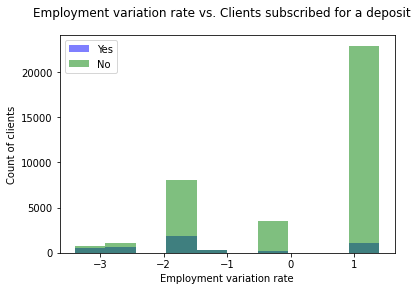

In [ ]:
fig, ax = plt.subplots()

ax.hist(df[df["y"]=='yes']["emp.var.rate"], bins=10, alpha=0.5, color="blue", label="Yes")
ax.hist(df[df["y"]=='no']["emp.var.rate"], bins=10, alpha=0.5, color="green", label="No")

ax.set_xlabel("Employment variation rate")
ax.set_ylabel("Count of clients")
#plt.ylim([0,4000])
fig.suptitle("Employment variation rate vs. Clients subscribed for a deposit")

ax.legend();

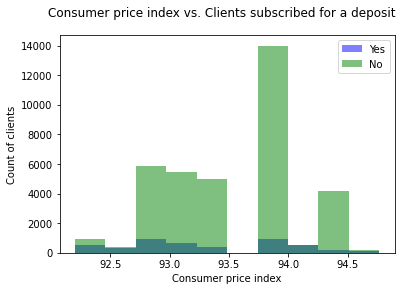

In [ ]:
fig, ax = plt.subplots()

ax.hist(df[df["y"]=='yes']["cons.price.idx"], bins=10, alpha=0.5, color="blue", label="Yes")
ax.hist(df[df["y"]=='no']["cons.price.idx"], bins=10, alpha=0.5, color="green", label="No")

ax.set_xlabel("Consumer price index")
ax.set_ylabel("Count of clients")
#plt.ylim([0,4000])
fig.suptitle("Consumer price index vs. Clients subscribed for a deposit")

ax.legend();

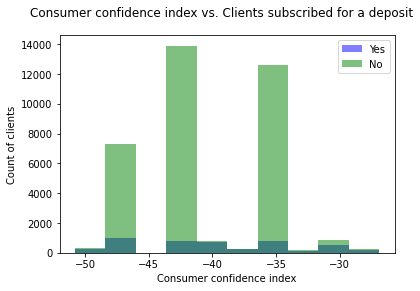

In [ ]:
fig, ax = plt.subplots()

ax.hist(df[df["y"]=='yes']["cons.conf.idx"], bins=10, alpha=0.5, color="blue", label="Yes")
ax.hist(df[df["y"]=='no']["cons.conf.idx"], bins=10, alpha=0.5, color="green", label="No")

ax.set_xlabel("Consumer confidence index")
ax.set_ylabel("Count of clients")
#plt.ylim([0,4000])
fig.suptitle("Consumer confidence index vs. Clients subscribed for a deposit")

ax.legend();

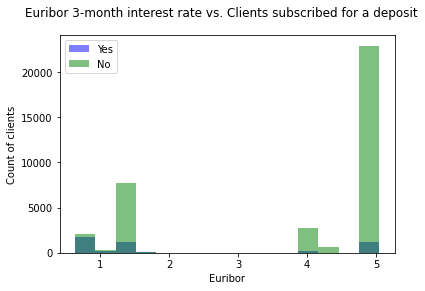

In [ ]:
fig, ax = plt.subplots()

ax.hist(df[df["y"]=='yes']["euribor3m"], bins=15, alpha=0.5, color="blue", label="Yes")
ax.hist(df[df["y"]=='no']["euribor3m"], bins=15, alpha=0.5, color="green", label="No")

ax.set_xlabel("Euribor")
ax.set_ylabel("Count of clients")
#plt.ylim([0,4000])
fig.suptitle("Euribor 3-month interest rate vs. Clients subscribed for a deposit")

ax.legend();

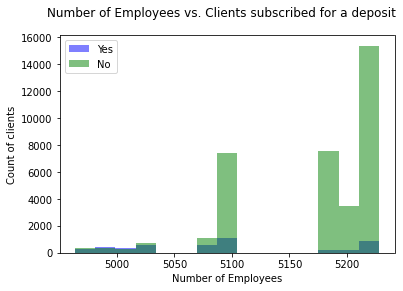

In [ ]:
fig, ax = plt.subplots()

ax.hist(df[df["y"]=='yes']["nr.employed"], bins=15, alpha=0.5, color="blue", label="Yes")
ax.hist(df[df["y"]=='no']["nr.employed"], bins=15, alpha=0.5, color="green", label="No")

ax.set_xlabel("Number of Employees")
ax.set_ylabel("Count of clients")
#plt.ylim([0,4000])
fig.suptitle("Number of Employees vs. Clients subscribed for a deposit")

ax.legend();

In order to create a heatmap I convert the categorical target variable into a numeric replacing the 'yes' option with 1, and 'no' with 0.

In [ ]:
df['y'] = df['y'].replace({'yes': 1, 'no': 0})

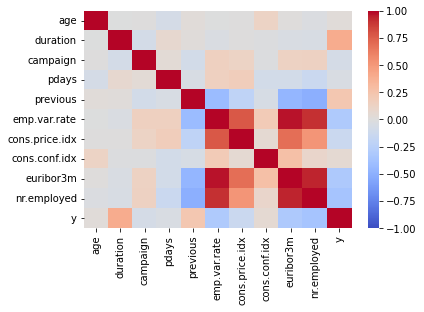

In [ ]:
sns.heatmap(df.corr(), cmap="coolwarm", vmin=-1, vmax=1)

The heatmap shows a distinct positive correlation of the target with variables 'duration' and 'previous' and a negative correlation with 'emp.var.rate', 'euribor3m', and 'nr.employed'. Other numeric variables don't correlate much with the target variable. This confirms the inferences which I have made analyzing histograms.

**Conclusion:**
    During the EDA performed on the given dataset I have examined input and output variables, defined their types, found out basic statistics of numerical ones.
    As the target variable is categorical I've had to use different methods of visualization than if the target would be numeric. For the numeric variables I have used mostly double histograms, for categorical variables - double (or stacked) bar plots. Other tools like scatterplots and jointplots don't work in the case we have here.
    I have also done a heatmap which gave very close results to what I made myself exploring histograms.
    From numeric variables in the dataset, the most correlated with the target are these: duration, previous, emp.var.rate, euribor3m, and nr.employed.
    From categorical variables the following show distinct correlations with the target:  job, contact type, poutcome.

# **Data cleaning + preprocessing**

It seems that we have high-quality data in the dataset. During EDA I haven't found any evidence of the fact that there are inconsistencies, duplicates, or wrong datatypes somewhere in the data.  

In [ ]:
df.isnull().sum()

age                   0
job                   0
marital               0
education             0
default               0
housing               0
loan                  0
contact               0
month                 0
day_of_week           0
duration              0
campaign              0
pdays             39673
previous              0
poutcome              0
emp.var.rate          0
cons.price.idx        0
cons.conf.idx         0
euribor3m             0
nr.employed           0
y                     0
dtype: int64

In [ ]:
COLS_TO_DROP = list((df.isna().sum(axis=0)/df.shape[0]).where(lambda x: x>0.2).dropna().index)
print(COLS_TO_DROP)

['pdays']


I have one column where I have a lot of NaN values - 'pdays'. These NA values previously were the special value of 999. I can't replace them with 0, mean, median or any other value from the actual range of this variable because this will distort all statistics and can affect the efficiency of the model. So I've decided to fill these rows with the same values that were there before I replaced them with NaN.   

In [ ]:
df['pdays'] = df['pdays'].replace(np.nan, 999)

Next we have several columns having some 'unknown' values. These are 'job', 'education', 'marital', 'default', 'housing' and 'loan'. I think that in our particular case it will be inaccurate to replace these 'unknowns' with some other values because it will affect statistics so am going to keep these values as is.  

In [ ]:
q = df["duration"].quantile(0.999)
df[df["duration"]>q][['duration','y']]

,duration,y
1689,2462,0
2313,3366,0
2330,2231,1
3774,2680,1
4213,3078,0
6280,3094,1
7297,2260,0
7727,3631,1
8362,2456,1
8643,2203,1


Thoroughly looking at potential outliers in the 'duration' column I've noticed that there are values above a very high quantile (0.999) which looked like valid data and moreover most of them have a positive outcome. So I suppose that cutting out these values can significantly affect the model.

In the next line, I am dropping some variables which I assumed did not have a decent influence on the target. And also I'm dropping the 'duration' variable as it highly affects the target drastically and that's why shouldn't be used in the model.
Actually, I've tried different combinations of columns to drop and find out that this set positively affects explained variance in PCA and SVD.

In [ ]:
df.drop(['day_of_week', 'month', 'age', 'pdays', 'campaign', 'marital', 'default', 'duration'], axis=1)

,job,education,housing,loan,contact,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,housemaid,basic.4y,no,no,telephone,999.0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,services,high.school,no,no,telephone,999.0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,services,high.school,yes,no,telephone,999.0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,admin.,basic.6y,no,no,telephone,999.0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,services,high.school,no,yes,telephone,999.0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,retired,professional.course,yes,no,cellular,999.0,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41184,blue-collar,professional.course,no,no,cellular,999.0,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41185,retired,university.degree,yes,no,cellular,999.0,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41186,technician,professional.course,no,no,cellular,999.0,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


Splitting columns on groups: numeric and nominal (we don't have ordinal data in our dataset)

In [ ]:
num_cols = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx',
    'cons.conf.idx', 'euribor3m', 'nr.employed']
nominal_cols = list(df.select_dtypes(object))

y = ['y']

<ipython-input-60-5e22d1b80002>:3: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  nominal_cols = list(df.select_dtypes(np.object))


Define pipelines for preprocessing different types of features

In [ ]:
num_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('variance_trsh', VarianceThreshold(threshold=0.1))
])

cat_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='unknown')),
    ('encoder', OneHotEncoder(drop='first',sparse=False)),
    ('variance_trsh', VarianceThreshold(threshold=.97 * (1 - .97)))
])


pipe = ColumnTransformer(transformers=[
    ('cat', cat_pipe, nominal_cols),
    ('num', num_pipe, num_cols)
])

In [ ]:
X = pipe.fit_transform(df)

In [ ]:
X.shape

(41188, 40)

In [ ]:
type(X)

numpy.ndarray

In [ ]:
print(X)

[[ 0.          0.          0.         ...  0.88644656  0.71245988
   0.33167991]
 [ 0.          0.          0.         ...  0.88644656  0.71245988
   0.33167991]
 [ 0.          0.          0.         ...  0.88644656  0.71245988
   0.33167991]
 ...
 [ 0.          0.          0.         ... -2.22495344 -1.49518647
  -2.8156966 ]
 [ 0.          0.          0.         ... -2.22495344 -1.49518647
  -2.8156966 ]
 [ 0.          0.          0.         ... -2.22495344 -1.49518647
  -2.8156966 ]]


In [ ]:
df_norm = pd.DataFrame(X)

In [ ]:
df_norm.describe()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
count,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,...,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,41188.000000,4.118800e+04
mean,0.224677,0.035350,0.070992,0.041760,0.034500,0.096363,0.163713,0.605225,0.280859,0.055647,...,-1.880382e-16,-1.397348e-17,-7.590531e-17,-2.580781e-16,5.520386e-18,7.797546e-17,-3.315820e-14,-1.352495e-16,0.000000,-1.024860e-14
std,0.417375,0.184665,0.256814,0.200042,0.182513,0.295092,0.370019,0.488808,0.449424,0.229242,...,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012,1.000012e+00
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-2.209365e+00,-9.961775e-01,-5.659220e-01,-5.149443e+00,-3.494943e-01,-2.216433e+00,-2.374889e+00,-2.224953e+00,-1.722351,-2.815697e+00
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-7.699804e-01,-6.027745e-01,-5.659220e-01,1.954139e-01,-3.494943e-01,-1.197935e+00,-8.649547e-01,-4.747909e-01,-1.312994,-9.402810e-01
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,-1.942267e-01,-3.019369e-01,-2.049085e-01,1.954139e-01,-3.494943e-01,6.480923e-01,2.994571e-01,-2.803284e-01,0.712460,3.316799e-01
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,6.694038e-01,2.341712e-01,1.561049e-01,1.954139e-01,-3.494943e-01,8.390606e-01,7.227225e-01,8.864466e-01,0.772422,8.451701e-01
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,5.563310e+00,1.797202e+01,1.928982e+01,1.954139e-01,1.379492e+01,8.390606e-01,2.058168e+00,2.939106e+00,0.820853,8.451701e-01


# **Dimencionality Reduction**

**PCA**

In [ ]:
pca = PCA(n_components=2)
new_X = pca.fit_transform(X)

In [ ]:
new_X

array([[-1.31750732,  0.95031496],
       [-1.37140525,  0.9404579 ],
       [-1.30072453,  0.3906609 ],
       ...,
       [ 1.7790041 , -0.53545567],
       [ 1.79029545, -0.7987955 ],
       [ 2.4530092 ,  1.00510567]])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


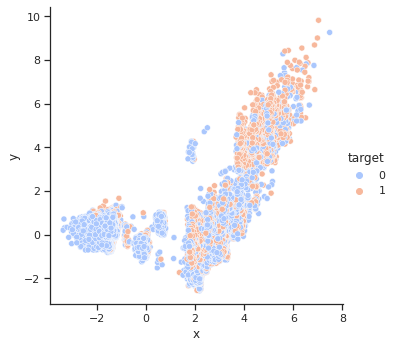

In [ ]:
plot_df = pd.DataFrame.from_records(data=new_X[:,:2],columns=["x","y"])
plot_df["target"] = df[y]

sns.set(style="ticks")
sns.relplot("x", "y", data=plot_df, hue="target", palette='coolwarm')

In the table below we can see loadings - weights for each of the initial components in both of the principal components.

In [ ]:
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'])
loadings

,PC1,PC2
0,-0.015299,-0.025705
1,-0.001587,-0.001703
2,0.001613,0.003085
3,0.010384,0.028825
4,-0.000603,-0.001583
5,-0.003271,-0.012244
6,-0.007450,0.002422
7,-0.023253,0.049543
8,0.025698,-0.057705
9,-0.003510,-0.003017


In [ ]:
pca.explained_variance_ratio_.sum()

0.3891903628366517

We've got an overall explained variance of 39% by our PCA model

In [ ]:
pca = PCA(n_components=0.95).fit(X)

len(pca.explained_variance_ratio_)

22

And this explained variance comes mostly (95% of variance) from 22 components (out of 40). We can see this in the plot below.

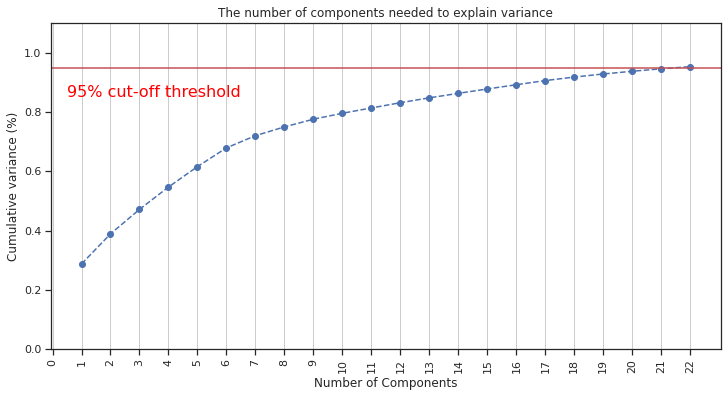

In [ ]:
number_of_ticks = len(pca.explained_variance_ratio_) + 1

fig, ax = plt.subplots(figsize=(12, 6))
x_ticks = np.arange(1, number_of_ticks, step=1)
y_values = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(x_ticks, y_values, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, number_of_ticks, step=1))
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.xticks(rotation=90)
plt.show()

**SVD**

In [ ]:
svd = TruncatedSVD(n_components=2, algorithm='arpack')
svd_X = svd.fit_transform(X)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


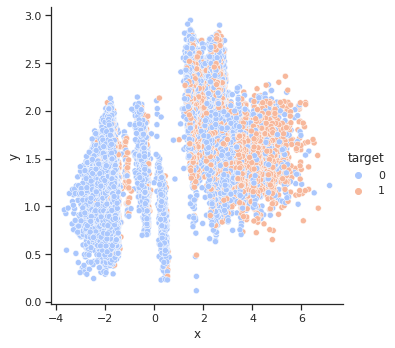

In [ ]:
plot_df = pd.DataFrame.from_records(data=svd_X[:,:2],columns=["x","y"])
plot_df["target"] = df[y]

sns.set(style="ticks")
sns.relplot("x", "y", data=plot_df, hue="target", palette='coolwarm')

In [ ]:
svd.explained_variance_ratio_.sum()

0.2980911270026129

**t-SNE**

In [ ]:
tsne = TSNE(perplexity=50, n_iter=1500)
tsne_X = tsne.fit_transform(X)

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


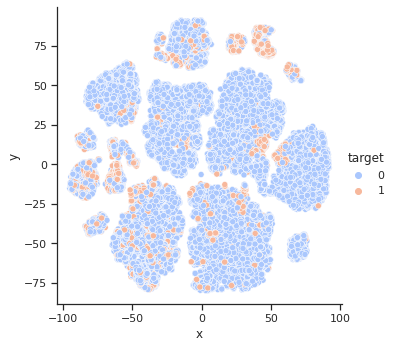

In [ ]:
plot_df = pd.DataFrame.from_records(data=tsne_X,columns=["x","y"])
plot_df["target"] = df[y]

sns.set(style="ticks")
sns.relplot("x", "y", data=plot_df, hue="target", palette='coolwarm')

In [ ]:
pca = PCA(n_components=0.95)
new_X = pca.fit_transform(X)

tsne = TSNE(n_components=2)
tsne_X_pca = tsne.fit_transform(new_X)

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


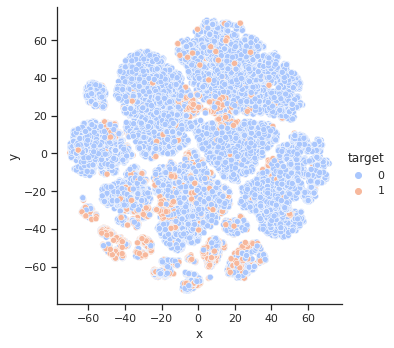

In [ ]:
plot_df = pd.DataFrame.from_records(data=tsne_X_pca,columns=["x","y"])
plot_df["target"] = df[y]

sns.set(style="ticks")
sns.relplot("x", "y", data=plot_df, hue="target", palette='coolwarm')